In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob
import seaborn as sns


import re  
import nltk
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('wordnet')
nltk.download('vader_lexicon')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/williamsa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/williamsa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
processed_df = pd.read_pickle("../data/df.pkl")

In [6]:
all_tokens = []

for row in processed_df['tweet_tokens']:
    for token in row:
        all_tokens.append(token)

freq_dist = FreqDist(all_tokens)

freq_dist.most_common(10)


[('store', 1003),
 ('new', 931),
 ('launch', 693),
 ('austin', 674),
 ('amp', 646),
 ('get', 557),
 ('social', 548),
 ('today', 521),
 ('circle', 481),
 ('network', 427)]

In [7]:
def visualize_top_10(freq_dist, title):

    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots()
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)


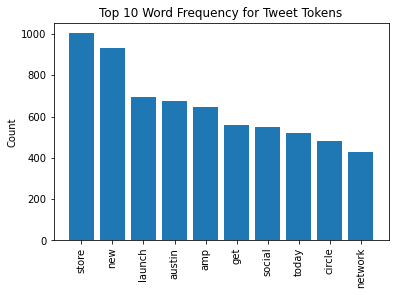

In [8]:
visualize_top_10(freq_dist, "Top 10 Word Frequency for Tweet Tokens")

In [9]:
processed_df['string_tokens'] = processed_df['tweet_tokens'].apply(" ".join)


In [10]:
pd.to_pickle(processed_df, '../data/processed_df.pkl')


In [11]:
X = processed_df['string_tokens']
y = processed_df['sentiment']


In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer(min_df= 0.05, max_df = 0.95)

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)


In [13]:

pos_df = processed_df[processed_df['sentiment'] == 2]

neg_df = processed_df[processed_df['sentiment'] == 0]


In [14]:
pos_tokens = []

for row in pos_df['tweet_tokens']:
    for token in row:
        pos_tokens.append(token)

pos_freq_dist = FreqDist(pos_tokens)

pos_freq_dist.most_common(10)


[('store', 415),
 ('new', 307),
 ('get', 235),
 ('austin', 212),
 ('launch', 173),
 ('amp', 171),
 ('go', 155),
 ('open', 142),
 ('come', 125),
 ('great', 118)]

In [15]:
neg_tokens = []

for row in neg_df['tweet_tokens']:
    for token in row:
        neg_tokens.append(token)

neg_freq_dist = FreqDist(neg_tokens)

neg_freq_dist.most_common(10)


[('new', 41),
 ('get', 37),
 ('need', 34),
 ('store', 34),
 ('people', 27),
 ('go', 26),
 ('circle', 25),
 ('think', 25),
 ('launch', 24),
 ('social', 23)]

In [31]:
bin_df = pd.concat([pos_df, neg_df])
bin_df

,tweet_text,emotion,char_count,word_count,sent_count,capital_char_count,capital_word_count,quoted_word_count,stopword_count,unique_word_count,htag_count,mention_count,avg_wordlength,avg_sentlength,unique_vs_words,stopwords_vs_words,tweet_tokens,sentiment,string_tokens
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,22,3,10,1,0,7,22,0,0,6.318182,7.333333,1.000000,0.318182,"[know, awesome, likely, appreciate, design, al...",2,know awesome likely appreciate design also giv...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,17,1,14,1,0,1,17,0,0,7.705882,17.000000,1.000000,0.058824,"[great, stuff, fri, mayer, tim, tech, amp, mat...",2,great stuff fri mayer tim tech amp matt mullen...
7,"#SXSW is just starting, #CTIA is around the co...",Positive emotion,138,28,1,8,2,0,15,24,0,0,4.928571,28.000000,0.857143,0.535714,"[start, corner, hop, skip, jump, good, time, fan]",2,start corner hop skip jump good time fan
9,Counting down the days to #sxsw plus strong Ca...,Positive emotion,88,16,1,3,0,0,5,16,0,0,5.500000,16.000000,1.000000,0.312500,"[counting, day, strong, canadian, dollar, mean...",2,counting day strong canadian dollar mean stock...
10,Excited to meet the @samsungmobileus at #sxsw ...,Positive emotion,118,21,2,6,2,0,7,21,0,0,5.619048,10.500000,1.000000,0.333333,"[excited, meet, show, sprint, galaxy, still, run]",2,excited meet show sprint galaxy still run
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,Google guy at #sxsw talk is explaining how he ...,Negative emotion,119,21,2,3,0,0,9,21,0,0,5.666667,10.500000,1.000000,0.428571,"[guy, talk, explain, make, realistic, twitter,...",0,guy talk explain make realistic twitter bot ex...
8611,I think my effing hubby is in line for an #iPa...,Negative emotion,125,25,3,3,1,0,8,24,0,0,5.000000,8.333333,0.960000,0.320000,"[think, eff, hubby, line, someone, point, towa...",0,think eff hubby line someone point towards wif...
8638,I'm pretty sure the panelist that thinks &quot...,Negative emotion,112,17,2,6,1,0,6,16,0,0,6.588235,8.500000,0.941176,0.352941,"[pretty, sure, panelist, think, drown, success...",0,pretty sure panelist think drown success fuck ...
8672,Hey is anyone doing #sxsw signing up for the g...,Negative emotion,140,27,2,1,0,0,14,25,0,0,5.185185,13.500000,0.925926,0.518519,"[hey, anyone, sign, group, texting, groupme, g...",0,hey anyone sign group texting groupme get else...


In [16]:
neg_tokens_string = ' '.join(neg_tokens)
pos_tokens_string = ' '.join(pos_tokens)


In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud().generate(neg_tokens_string)


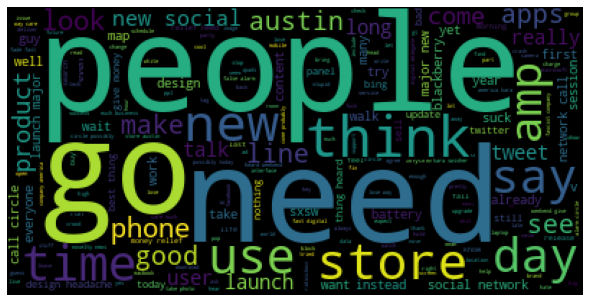

In [17]:
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


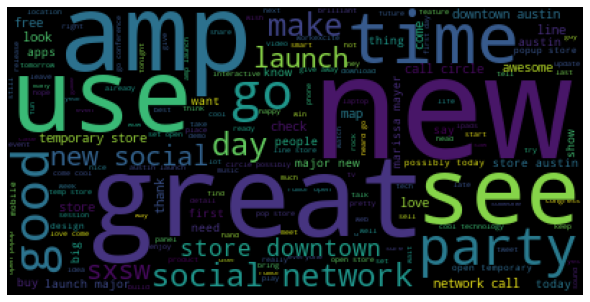

In [18]:

wordcloud = WordCloud().generate(pos_tokens_string)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [19]:

# #Calculating Negative, Positive, Neutral and Compound values

sia = SentimentIntensityAnalyzer()
polarity_scores_df = processed_df['string_tokens'].apply(lambda x: sia.polarity_scores(x))
polarity_scores_df = pd.DataFrame(polarity_scores_df)


In [20]:
polarity_scores_df['string_tokens']


0       {'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'comp...
1       {'neg': 0.0, 'neu': 0.331, 'pos': 0.669, 'comp...
4       {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...
7       {'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...
9       {'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compou...
                              ...                        
8713    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8714    {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...
8717    {'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...
8718    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8719    {'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...
Name: string_tokens, Length: 6102, dtype: object

In [21]:
print(polarity_scores_df['string_tokens'].iloc[0])


{'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6486}


In [22]:
polarity_scores_df['neg'] = polarity_scores_df['string_tokens'].apply(lambda x: x['neg'])
polarity_scores_df['neu'] = polarity_scores_df['string_tokens'].apply(lambda x: x['neu'])
polarity_scores_df['pos'] = polarity_scores_df['string_tokens'].apply(lambda x: x['pos'])
polarity_scores_df['compound'] = polarity_scores_df['string_tokens'].apply(lambda x: x['compound'])


In [23]:
polarity_scores_df = polarity_scores_df.drop(columns = 'string_tokens')
polarity_scores_df


,neg,neu,pos,compound
0,0.417,0.583,0.000,-0.6486
1,0.000,0.331,0.669,0.8779
4,0.000,0.687,0.313,0.6249
7,0.000,0.536,0.464,0.6369
9,0.000,0.680,0.320,0.5106
...,...,...,...,...
8713,0.000,1.000,0.000,0.0000
8714,0.000,0.874,0.126,0.0772
8717,0.375,0.625,0.000,-0.4939
8718,0.000,1.000,0.000,0.0000


<AxesSubplot:>

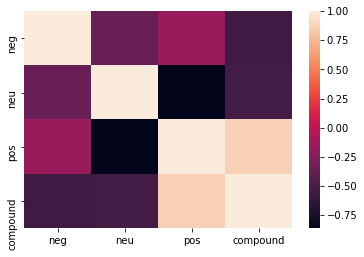

In [27]:
sns.heatmap(polarity_scores_df.corr())
